In [1]:
import numpy as np #
import pandas as pd

import os

In [2]:
import random
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
def load_images_from_folder(folder, image_size=(300, 300)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                if filename == '.DS_Store':  # Ignore .DS_Store files in Macs
                    continue
                img_path = os.path.join(label_path, filename)
                img = Image.open(img_path)
                img = img.resize(image_size)
                img = np.array(img)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

In [5]:
data_dir = '/Users/jaspuurrrr/INTRO_TO_AI/DeepLearningProject/dataset_'
image_size = (300, 300)

In [6]:
X, y = load_images_from_folder(data_dir, image_size)

In [7]:
X = X / 255.0

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:
y = to_categorical(y)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (998, 300, 300, 3)
X_val shape: (250, 300, 300, 3)
y_train shape: (998, 12)
y_val shape: (250, 12)


In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (4, 4), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (4, 4), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (4, 4), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 70, 70, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │        12,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,573,068 (105.18 MB)

 Trainable params: 27,573,068 (105.18 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 296s 9s/step - accuracy: 0.1162 - loss: 2.5861 - val_accuracy: 0.1280 - val_loss: 2.4236
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 224s 6s/step - accuracy: 0.1153 - loss: 2.3830 - val_accuracy: 0.1280 - val_loss: 2.4808
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 185s 6s/step - accuracy: 0.1414 - loss: 2.4828 - val_accuracy: 0.1280 - val_loss: 2.4761
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 172s 5s/step - accuracy: 0.1319 - loss: 2.4764 - val_accuracy: 0.1280 - val_loss: 2.4784
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 154s 5s/step - accuracy: 0.1412 - loss: 2.4759 - val_accuracy: 0.1280 - val_loss: 2.4736
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 161s 5s/step - accuracy: 0.1492 - loss: 2.4682 - val_accuracy: 0.1280 - val_loss: 2.4720
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.1193 - loss: 2.4757 - val_accuracy: 0.1280 - val_loss: 2.4722
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.1422 - loss: 2.4651 - val_accuracy: 0.1280 - v

In [23]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy:.4f}')

model.save('/Users/jaspuurrrr/INTRO_TO_AI/DeepLearningProject/dog_breed_classifier_model-exp-3.h5')


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8838 - loss: 0.9988


Validation accuracy: 0.8680


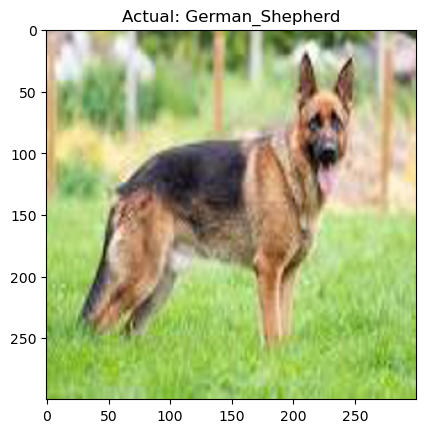

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Prediction probabilities: [[8.9250143e-08 2.1312363e-08 1.8190652e-06 4.9310524e-06 6.5220036e-07
  9.9998677e-01 3.0145909e-06 7.1037086e-08 1.6811374e-07 1.9426755e-08
  1.1326135e-06 1.2674222e-06]]
Predicted class: German_Shepherd


In [35]:
def predict_random_image(model, X_val, y_val, label_encoder, image_size=(300, 300)):
    idx = random.randint(0, len(X_val) - 1)
    img = X_val[idx]
    actual_label = y_val[idx]
    
    plt.imshow(img)
    plt.title(f'Actual: {label_encoder.inverse_transform([np.argmax(actual_label)])[0]}')
    plt.show()

    img_array = img.reshape(1, *image_size, 3)
    y_pred = model.predict(img_array)
    print(f'Prediction probabilities: {y_pred}')

    predicted_class = label_encoder.inverse_transform([np.argmax(y_pred)])
    print(f'Predicted class: {predicted_class[0]}')

model = load_model('/Users/jaspuurrrr/INTRO_TO_AI/DeepLearningProject/dog_breed_classifier_model-exp-3.h5')

predict_random_image(model, X_val, y_val, label_encoder)

Enter the path to the image:  test1.jpg
Enter the actual label of the image:  Golden Retriever


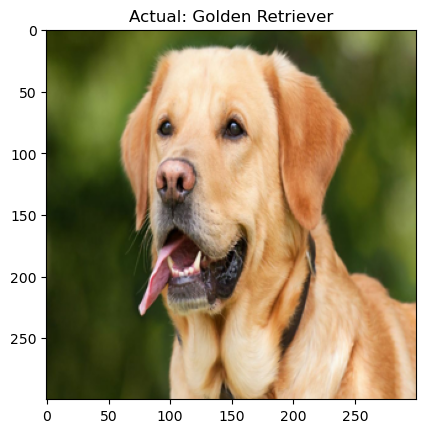

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Prediction probabilities: [[2.3922945e-11 4.6302084e-11 4.6316181e-05 1.5230853e-03 1.0700633e-04
  9.8399440e-09 8.6071110e-01 1.2408801e-09 2.5696670e-08 6.0433776e-11
  3.8413923e-06 1.3760874e-01]]
Predicted class: Golden_Retriever


In [107]:
def predict_custom_image(model, image_path, actual_label, label_encoder, image_size=(300, 300)):
    img = Image.open(image_path)
    img = img.resize(image_size)
    img_array = np.array(img)

    actual_label = actual_label
    
    plt.imshow(img)
    plt.title(f'Actual: {actual_label}')
    plt.show()

    img_array = img_array.reshape(1, *image_size, 3) / 255.0  # Normalize image
    y_pred = model.predict(img_array)
    print(f'Prediction probabilities: {y_pred}')

    predicted_class = label_encoder.inverse_transform([np.argmax(y_pred)])
    print(f'Predicted class: {predicted_class[0]}')

image_path = input("Enter the path to the image: ")
actual_label = input("Enter the actual label of the image: ")

model = load_model('/Users/jaspuurrrr/INTRO_TO_AI/DeepLearningProject/dog_breed_classifier_model-exp-2.h5')

predict_custom_image(model, image_path, actual_label, label_encoder)